In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
from datetime import datetime

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

import matplotlib.pyplot as plt

import os
import cv2

print(tf.VERSION)
print(tf.keras.__version__)
print('cv2: ' + cv2.__version__)

# pull in vid_to_20 from savedFramesIn20
# might not need to if videos are preprocessed

tf.enable_eager_execution()


1.13.1
2.2.4-tf
cv2: 3.4.1


In [2]:
WorkingDir = 'C:\\Users\\Fletcher\\Documents\\McDaniel\\Summer 2019 research\\Python Code\\'
TestFrames1DIR = WorkingDir + 'Images-Videos\\TestFrames1.1\\'

CATEGORIES = ['ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'BalanceBeam', 'BandMarching',
              'BaseballPitch', 'Basketball', 'BasketballDunk', 'BenchPress', 'Biking', 'Billiards', 'BlowDryHair',
              'BlowingCandles', 'BodyWeightSquats', 'Bowling', 'BoxingPunchingBag', 'BoxingSpeedBag', 'Breaststroke',
              'BrushingTeeth', 'CleanandJerk', 'CliffDiving', 'CricketBowling', 'CricketShot', 'CuttingInKitchen',
              'Diving', 'Drumming', 'Fencing', 'FieldHockeyPenalty', 'FloorGymnastics', 'FrisbeeCatch', 'FrontCrawl',
              'GolfSwing', 'Haircut', 'HammerThrow', 'Hammering', 'HandstandPushups', 'HandstandWalking',
              'HeadMassage', 'HighJump', 'HorseRace', 'HorseRiding', 'HulaHoop', 'IceDancing', 'JavelinThrow',
              'JugglingBalls', 'JumpRope', 'JumpingJack', 'Kayaking', 'Knitting', 'LongJump', 'Lunges',
              'MilitaryParade', 'Mixing', 'MoppingFloor', 'Nunchucks', 'ParallelBars', 'PizzaTossing',
              'PlayingGuitar', 'PlayingPiano', 'PlayingTabla', 'PlayingViolin', 'PlayingCello', 'PlayingDaf',
              'PlayingDhol', 'PlayingFlute', 'PlayingSitar', 'PoleVault', 'PommelHorse', 'PullUps', 'Punch',
              'PushUps', 'Rafting', 'RockClimbingIndoor', 'RopeClimbing', 'Rowing', 'SalsaSpin', 'ShavingBeard',
              'Shotput', 'SkateBoarding', 'Skiing', 'Skijet', 'SkyDiving', 'SoccerJuggling', 'SoccerPenalty',
              'StillRings', 'SumoWrestling', 'Surfing', 'Swing', 'TableTennisShot', 'TaiChi', 'TennisSwing',
              'ThrowDiscus', 'TrampolineJumping', 'Typing', 'UnevenBars', 'VolleyballSpiking', 'WalkingWithDog',
              'WallPushups', 'WritingOnBoard', 'YoYo']

In [3]:
testing_data1 = []
catNum = 0
count = 0

# iterate through each category
for category in CATEGORIES:
    # limit to a certain number of categories, later use all categories
    if(catNum > 14):
        break

    # update the path, print the name of the category
    pathCat = os.path.join(TestFrames1DIR, category)
    pathVid = TestFrames1DIR + str(category)
    print( str(catNum) + ': ' + category )

    # iterate through each video
    for video in os.listdir(pathVid):
        pathImg = pathVid + '/' + str(video)

        for img in os.listdir(pathImg):
            img_array = cv2.imread(pathImg + '/' + img)
            testing_data1.append([np.array(img_array), catNum])

    catNum += 1
print("done")

0: ApplyEyeMakeup
1: ApplyLipstick
2: Archery
3: BabyCrawling
4: BalanceBeam
5: BandMarching
6: BaseballPitch
7: Basketball
8: BasketballDunk
9: BenchPress
10: Biking
11: Billiards
12: BlowDryHair
13: BlowingCandles
14: BodyWeightSquats
done


In [4]:
len(testing_data1)

5680

In [5]:
def sort_by_frame(testing_data):
    X = []
    y = []


    for features, label in testing_data:
        X.append(features)
        y.append(label)


    X = np.array(X) # convert to numpy array

    i=0
    # 20 arrays
    # X2[0] holds frame 0 of each video, X2[1] holds frame 1, etc.
    X2 = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

    # holds the category tag of the videos; y2[0] is for the 0th frames, etc.
    y2 = []

    # put data from 0-255 into scale of 0-1
    X = X/255.

    # split each viedo along the columns of X2
    for frame in X:
        X2[ i % 20 ].append(frame)

        if i % 20 == 0:
            # add the video's tag to y2
            y2.append(y[i]) 

        i+=1
        if i % 1000 == 0:
            print(i)

    X = None # free up storage

    print('done')
    return X2, y2


In [6]:
X_train1, y_train1 = sort_by_frame(testing_data1)
testing_data1 = None # free up storage

1000
2000
3000
4000
5000
done


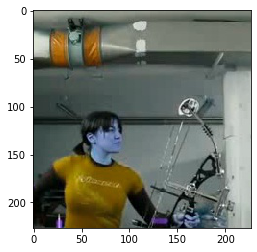

y category: 2 Archery


In [7]:
set = 50
set_ = (int)(set/20)
plt.imshow(X_train1[0][set])
plt.show()
print( 'y category: ' + str(y_train1[set]) + ' ' + CATEGORIES[y_train1[set]])

In [8]:
len(y_train1)

284

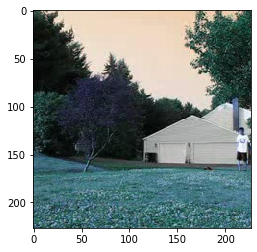

Actual category: 6 BaseballPitch


In [10]:
set = 2300
set_ = (int)(set/20)
set = set%20
plt.imshow(X_train1[set][set_])
plt.show()
print( 'Actual category: ' + str(y_train1[set_]) + ' ' + CATEGORIES[y_train1[set_]])

train_limit = (int)(100 * 0.8) # replace 100 with full size of dataset later

# take about 80% of the data for training

plt.imshow(X_train[1][1])
plt.show()
print(X_train[1])
print(train_limit)

# the network

In [12]:
# first convolutional layers
# should each output shape 55x55x96
frames = [''] *20
inputs = [''] *20
print(frames)

for i in range(20):
    inputs[i] = tf.keras.Input(shape=(227,227,3,))
    frames[i] = tf.keras.layers.Conv2D(96, 11, input_shape=(227, 227, 3), strides=4, activation='relu' )(inputs[i])

# add the 20 frames into each other
# should output shape 55x55x96 
added = tf.keras.layers.Add()( frames )


# normalization
norm1 = layers.BatchNormalization()( added )
# first pooling layer
pool1 = layers.MaxPool2D( pool_size=3, strides=2 )( norm1 )


# first 2D convolutional
conv2 = layers.Conv2D(256, 5, strides=1 )( pool1 )
# normalization
norm2 = layers.BatchNormalization()(conv2)
# second pooling
pool2 = layers.MaxPool2D( pool_size=3, strides=2 )( norm2 )


# third convolutional layer
conv3 = layers.Conv2D(384, 3, strides=1 )( pool2 )
# fourth convolutional
conv4 = layers.Conv2D(384, 3, strides=1 )( conv3 )
# fifth convolutional
conv5 = layers.Conv2D(256, 3, strides=1 )( conv4 )
# third pooling
pool3 = layers.MaxPool2D( pool_size=3, strides=2 )( conv5 )

# 
flat = layers.Flatten()( pool3 )

# three fully-connected layers
fc1 = layers.Dense( units=512 )( flat ) # i reduced the number of units for testing on my laptop
fc2 = layers.Dense( units=512 )( fc1 )
fc3 = layers.Dense( units=101 )( fc2 )

# softmax
soft = layers.Activation( 'softmax' )( fc3 )

model = tf.keras.Model( inputs=inputs, outputs=soft )

from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,
              metrics=['accuracy'])

In [ ]:
model.fit(X_train1, y_train1, batch_size = 10, epochs = 5, validation_split=0.0)

Epoch 1/5


## get the model's prediction

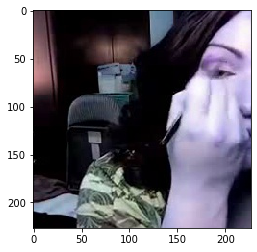

Actual category: 0: ApplyEyeMakeup
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]


In [17]:
set = 0

predictor = []
for index in X_train1:
    hold = index[set]
    hold = [hold]
    predictor.append(hold)


plt.imshow(predictor[0][0])
plt.show()
    
predict = model.predict(predictor)


print( 'Actual category: ' + str(y_train1[set]) + ': ' + CATEGORIES[y_train1[set]])

print(predict)

'2019-07-09-14:28'